<a href="https://colab.research.google.com/github/mandyyy25/PYTHON-/blob/main/Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Statsmodelsapi and Databaseerror
## In this notebook I made a simple linear model to predict tha sales in time, the results of the prediction were computed on a matrix along with the residue of each point.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = {"time":[1,3,4,4,6,7,7,9,10], "sales":[91,110,113,114,119,124,124,131,132]}
dataset = pd.DataFrame(dataset)
dataset.head()


,time,sales
0,1,91
1,3,110
2,4,113
3,4,114
4,6,119


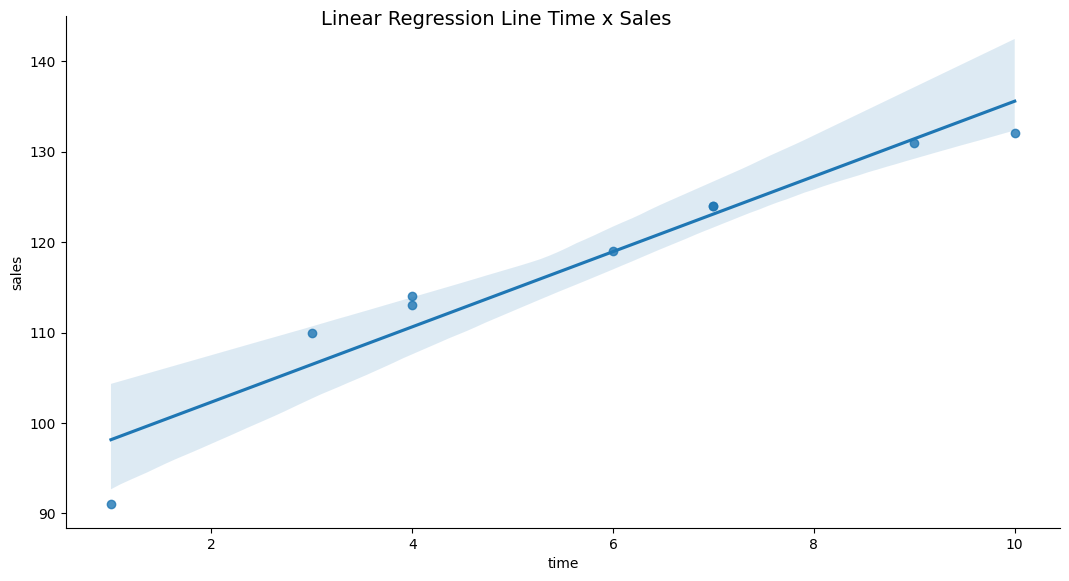

In [3]:
from pandas.io.sql import DatabaseError
ax = sns.lmplot(x="time", y = "sales", data = dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Linear Regression Line Time x Sales", fontsize = 14)
ax;


In [4]:
dataset.corr()

,time,sales
time,1.00000,0.96179
sales,0.96179,1.00000


In [5]:
import statsmodels.api as sm

In [6]:
y = dataset.sales
x = sm.add_constant(dataset.time)

In [7]:
regression_results = sm.OLS(y,x).fit()

In [8]:
print(regression_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     86.38
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.46e-05
Time:                        18:24:33   Log-Likelihood:                -23.386
No. Observations:                   9   AIC:                             50.77
Df Residuals:                       7   BIC:                             51.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.0000      2.817     33.371      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
dataset["Y_predicted"] = regression_results.predict()
dataset.head()

,time,sales,Y_predicted
0,1,91,98.156863
1,3,110,106.470588
2,4,113,110.627451
3,4,114,110.627451
4,6,119,118.941176


In [10]:
dataset["residue"] = dataset["Y_predicted"] - dataset["sales"]
dataset.head()

,time,sales,Y_predicted,residue
0,1,91,98.156863,7.156863
1,3,110,106.470588,-3.529412
2,4,113,110.627451,-2.372549
3,4,114,110.627451,-3.372549
4,6,119,118.941176,-0.058824
